# MA336 LAB 6 - HANDWRITTEN NUMBERS CLASSIFICATION

In this session we will learn how to create and train from scratch a Convolutional Neural Network that is able to recognize handwritten numbers. This is a typical problem in Handwriting Recognition (HWR) that has many applications in our nowadays society, from being able to transcript text from phones and tablets to quickly scan and digitize old documents. It is also widely used in all kind of administrative procedures, for example when we are asked to fill a from manually writing the letters and numbers in single-letter boxes, so the information in the document can be effectively and quickly gathered.

The HWR is not a recent problem. Back in 1974 [Ray Kurzweil](https://en.wikipedia.org/wiki/Ray_Kurzweil) commercialised the first software able to recognize characters in multiple fonts. The software hardcoded the extraction of manually selected features of the different symbols. The creation of databases such as [MNIST](http://yann.lecun.com/exdb/mnist/) and the upcoming of the Convolutional Neural Networks (CNN) automated the feature extraction and increased the accuracy of the algorithms. In 2011 [a team of computer scientists achieved an astonoshing 99.73% accuracy rate](https://ieeexplore.ieee.org/document/6065487), comparable to human performance. Read [this](https://towardsdatascience.com/https-medium-com-rachelwiles-have-we-solved-the-problem-of-handwriting-recognition-712e279f373b) interesting post from "towards data science" blog for more details.

In our lab we are going to limit our exercise to recognise only handwritten digits from the MNIST dataset. The structure of the code and the Neural Network that we are going to use is very similar to what we did in the "Cats vs Dogs" seminar. Make sure you are familiar with it.


## The Dataset

The MNIST dataset is one of the built-in datasets in keras library that we can easily import without having to download and structure the dataset. We can split the content in four variables for easily handling the data throughout our code.

In [1]:
from keras.datasets import mnist
(trainX, trainY), (testX, testY) = mnist.load_data()

trainX and testX contain the 60000 images for training and 10000 for testing respectively, and trainy and testy contain its corresponding labels, 0-9 integers, in a vector. We can observe the specific format of the variables by checking its .shape attribute. 

In [2]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


It is important that we understand that we are operating with images of 28x28 pixels. As anything inside computers, images are a collection of numbers structured in a particular way. Normally each pixel has three values from 0 to 255 for each RGB channel. However, in this case as the images are greyscaled for each pixels we have one value from 0 (black) to 255 (white). For one image, we have a 28x28 tuple, i.e. a vector of 28 vectors where each inner vector represents a row of pixels. We can see the whole object by printing the first element.

In [3]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In case we want to see the corresponding image we can directly use the imshow() function from the matplotlib library. Let's have a look to the first nine images of the training dataset `trainX`:

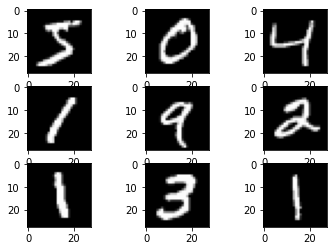

In [16]:
from matplotlib import pyplot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

And its corresponding labels in the trainy variable,

In [17]:
print(trainY[:9])

[5 0 4 1 9 2 1 3 1]


Now let's do the same, plotting the images and printing its corresponding labels, for the first nine numbers in the test dataset.

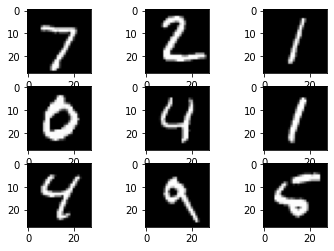

[7 2 1 0 4 1 4 9 5]


In [18]:
# FOR loop to print the first 9 images of the testX dataset
for i in ???:
???
# print the first 9 lables of the testy variable
???

## Pre-processing

In the MNIST dataset al the numbers are already nicely pre-processed, the numbers are scaled to 28x28 pixels, centred and greyscaled. This of course is very convenient for training our data. However, it still needs some adjustments. The first one is explicitly specifying that the images have only one channel, so the algorithm does not get confused when reading the images. To do so, we need to re-shape our 28x28 tuples and converting it to 28 x 28 x 1, indicating that in each pixel position we have one single value instead of the usual 3 for RGB (28 x 28 x 3). The numbers will be exactly the same, only the format will slightly change. We can use the `.reshape()` method to do that.

In [22]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

Another typical pre-processing method that must be followed when dealing with images is to scale pixel values. There are three options here:
* __Pixel Normalisation:__ Scale pixel values to the 0-1 range.
* __Pixel Centring:__ Scale pixel values to zero mean, with negative and positive values.
* __Pixel Standarisation:__ Scale pixel values to zero mean and unit variance.

In this case we are going to use pixel normalisation, so we need to rescale the value range from 0-255 to 0-1.

In [23]:
#Normalise pixel values
trainX = trainX / 255.0
testX = testX / 255.0

The target datasets vectors also need some readjustment. The MNIST dataset provides integer numbers from 0 to 9, but here the real machine learning problem type is a __classification problem__ (categorical) rather than a regression problem (numerical). Thus, the error from predicting 3 instead of 2 is not smaller than predicting 8 instead of 2. Failing the prediction counts the same no matter how close those numbers are, we have to treat them like labels. In order to frame the problem correctly we need to convert the numbers in the test variables, from integers to categories. As there are 10 mutually exclusive categories, we will represent this by a vector with 10 position where everything will be zeros except the position that indicates the number, that will be filled with a 1. For example, the number 3 will then be encoded as a vector of zeros except a 1 in the fourth position (the first position is for the 0): `[0 0 0 1 0 0 0 0 0 0]`. Fortunately, keras library provides the `to_categorical()` function that does this job efficiently. 

In [21]:
from keras.utils import to_categorical

print("First 9 Train Y values before conversion:")
print(trainY[:9])

# Convert labels from a 0-9 integer to a category (vector)
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print("First 9 Train Y values after conversion:")
print(trainY[:9])

First 9 Train Y values before conversion:
[5 0 4 1 9 2 1 3 1]
First 9 Train Y values after conversion:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Let's create a convenient function that we can name `load_dataset()` for loading and preprocessing the MNIST data. The function outputs the four variables, `trainX`, `trainY`, `testX` and `testY` with the data treated as explained in this section. 

In [8]:
from keras.utils import to_categorical

# Function to load and prepare the dataset
def load_dataset():
    # load dataset
    ??? = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = ???
    testX = ???
    # Convert to float32 and normalize the pixel value from 0-255 to 0-1
    trainX = ???
    testX = ???
    # Convert to cateogrical format
    trainY = ???
    testY = ???
    return trainX, trainY, testX, testY

## Define the model

For building our model we are going to start with the most simple CNN that does the job fairly well. In case we want to expand this model further we can always add more layers and see how the accuracy improves.

As the usual convolutional neural networks, the model has two resolve to tasks. The first one (front-end) is to extract the features from the image, which will be done by the convolutional layer followed by a pooling layer. The second task (back-end) is to use those features to classify the image in one of the ten possible digits. This will be achieved by the back-end classifier layers that will output the prediction.  

For the convolutional front-end, we will use a __single 2D convolutional layer__ with __32 filters__ and a small __filter size (3,3)__, with __ReLU activation__ and __He weight initialization__. This will be followed by a __2D max pooling layer__. Then the filter maps will be __flattened__ in order to provide all the features to the classifier. Before the final layer we will add a __dense layer__ with __100 nodes__ to interpret the features. This one will also use __ReLU activation__ and __He weight initialization__. Finally, the last __output layer__ has to contain __10 nodes__ with __softmax activation__ to determine the category. 

For the learning configuration we will use a __stochastic gradient descent__ (SGD) optimizer with a __learning rate of 0.01__ and a __momentum of 0.9__. The __categorical cross-entropy loss__ function will be optimized, suitable for multi-class classification, and we will monitor the classification __accuracy__ metric, which is appropriate given we have the same number of examples in each of the 10 classes.

The model described here will be built in a function called `define_model()` that will output the model configuration ready for training.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD

def define_model():
    # Define the Sequential model class for our case
    model = Sequential()
    # Define the layers of our network
    model.add(???)
    model.add(???)
    model.add(???)
    model.add(???)
    model.add(???)
    # compile model and training configuration
    opt = SGD(???)
    model.compile(optimizer=opt, loss=???, metrics=???)
    return model

## Diagnostics 

In order to understand how well our model is performing we need to produce some outputs after training it. Thus, observing the accuracy and entropy loss metrics in each of the training epochs will help us to asses whether our CNN is underfitting or overfitting the data. The final accuracy can also be provided as baseline. This is particularly useful in case we want to try and compare alternative model configurations.

Thus, the diagnostics function below takes the final accuracy value and training history data, that we get as an output after training our network, and produces nice plots easy to read. 

In [11]:
def diagnostics(acc, history):
    
    # Print final accuracy
    ???
    
    # Entropy Loss plot
    pyplot.subplot(211)
    pyplot.subplots_adjust(hspace=0.4)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(???, color='blue', label='train')
    pyplot.plot(???, color='orange', label='test')
    
    # Accuracy plot
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(???, color='blue', label='train')
    pyplot.plot(???, color='orange', label='test')
    
    # Save plot
    pyplot.savefig("diagnostics_plot.png")
    pyplot.close()

## Run the algorithm

Everything is now ready to run our model and train our CNN with the MNIST dataset. The most convenient way to do it is by creating a function named `run()`, that contains all the previous steps before training, then training and evaluating the network and finally plotting some of the results. Including a line for saving the model it is always a good idea. This creates a 4.4MB file that we can load and use for predicting new numbers as explain below.

__Note__: Training a CNN such as the one here with a dataset of 70,000 different instances can take quite a while. Of course this will depend on your hardware setup and whether you are running it in a machine with GPU or CPU only. As a reference, it took my laptop, an intel core i7 with 16GB of RAM, several minutes to complete the training. 

In [12]:
def run():
    # load dataset
    ???
    # define model
    ???
    # fit model
    ???
    # evaluate model
    ???
    # Print accuracy and plot the diagnostics curves
    ???
    # save the model to file
    model.save('handwritten_numbers_classification_model.h5')

run()

Accuracy: 98.86%


## Discussion

The result printed on the screen should show a value close to 99% accuracy. That is quite striking! With a relatively simple convolutional neural network we are getting very high accuracy rates. This shows that the performance achieved by CNN is much better than other machine learning algorithms for this kind of problems.

As for the diagnostics, the below image should have appeared in the same directory where your jupyter notebook is stored.

<img src="diagnostics_plot.png">

*??? (Modify this Markdown text box and put your comments on the accuracy rate and the abpve plot in no more than 100 words.)*

## Load the model for applications

When running the function that builds and trains the model we also export the model in a file named `"handwritten_numbers_classification_model.h5"`. This file contains all the parameters of the CNN resulting from the training process. Therefore, we can use this network for predicting new instances. This section explains how we can make use of this already trained network.

Imagine that we want to classify a new image, like the one you see below.

<img src="sample_image.png" alt="sample_image" width="100">

The first thing we need to do is to pre-process the image in the same way that we have pre-processed the images in the `trainX` and `testX` datasets. We create a function that does this job given a filename (which should correspond to an image stored in the same working directory than the jupyter notebook). Unlike with the MNIST dataset, now we are loading the image from an external source rather than importing it from a package. The functions `load_img()` and `img_to_array()` will be particularly useful here (check its [documentation page](https://keras.io/api/preprocessing/image/)).

In [4]:
from keras.preprocessing.image import load_img, img_to_array
 
def load_image(filename):
    # load the image
    img = load_img(???)
    # convert to array
    img = img_to_array(???)
    # reshape into a single sample with 1 channel
    img = ???
    # prepare pixel data
    img = ???
    return img

This function will give us the image in the format we need. Then we only need to load our model, using `load_model()`, and predict the class for that image, the attribute `model.predict_classes()` will work for this particular CNN. 

In [9]:
from keras.models import load_model
from numpy import argmax

def new_prediction():
    # load the image
    img = ???
    # load model
    model = ???
    # make the prediction, this outputs the probability for each category
    digit = ???
    # print the category using argmax
    print(???)

new_prediction()

7


As you can see, our model should correctly guess it most of the times. __Congratulations! You have successfully train a Convolutional Neural Network that is able to predict handwritten numbers!__

If you really want to test the model by yourselves, you can also use 28 x 28 pixel images with a number drawn in it using Photoshop or equivalent software. Alternatively, you can draw digit numbers in a piece of paper, take a picture, shrink the image to a 28 x 28 picture and convert it to a greyscale where the background is black. Your network should also be able to produce good predictions on your own handwritten numbers. In fact, there are many [online websites](http://www.ccom.ucsd.edu/~cdeotte/programs/MNIST.html) that provide a front-end to draw a number and use a CNN to classify it. This is not far from your own skills right now!